In [8]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array

In [11]:
picture_size = 48
folder_path = "../../Data/images/"

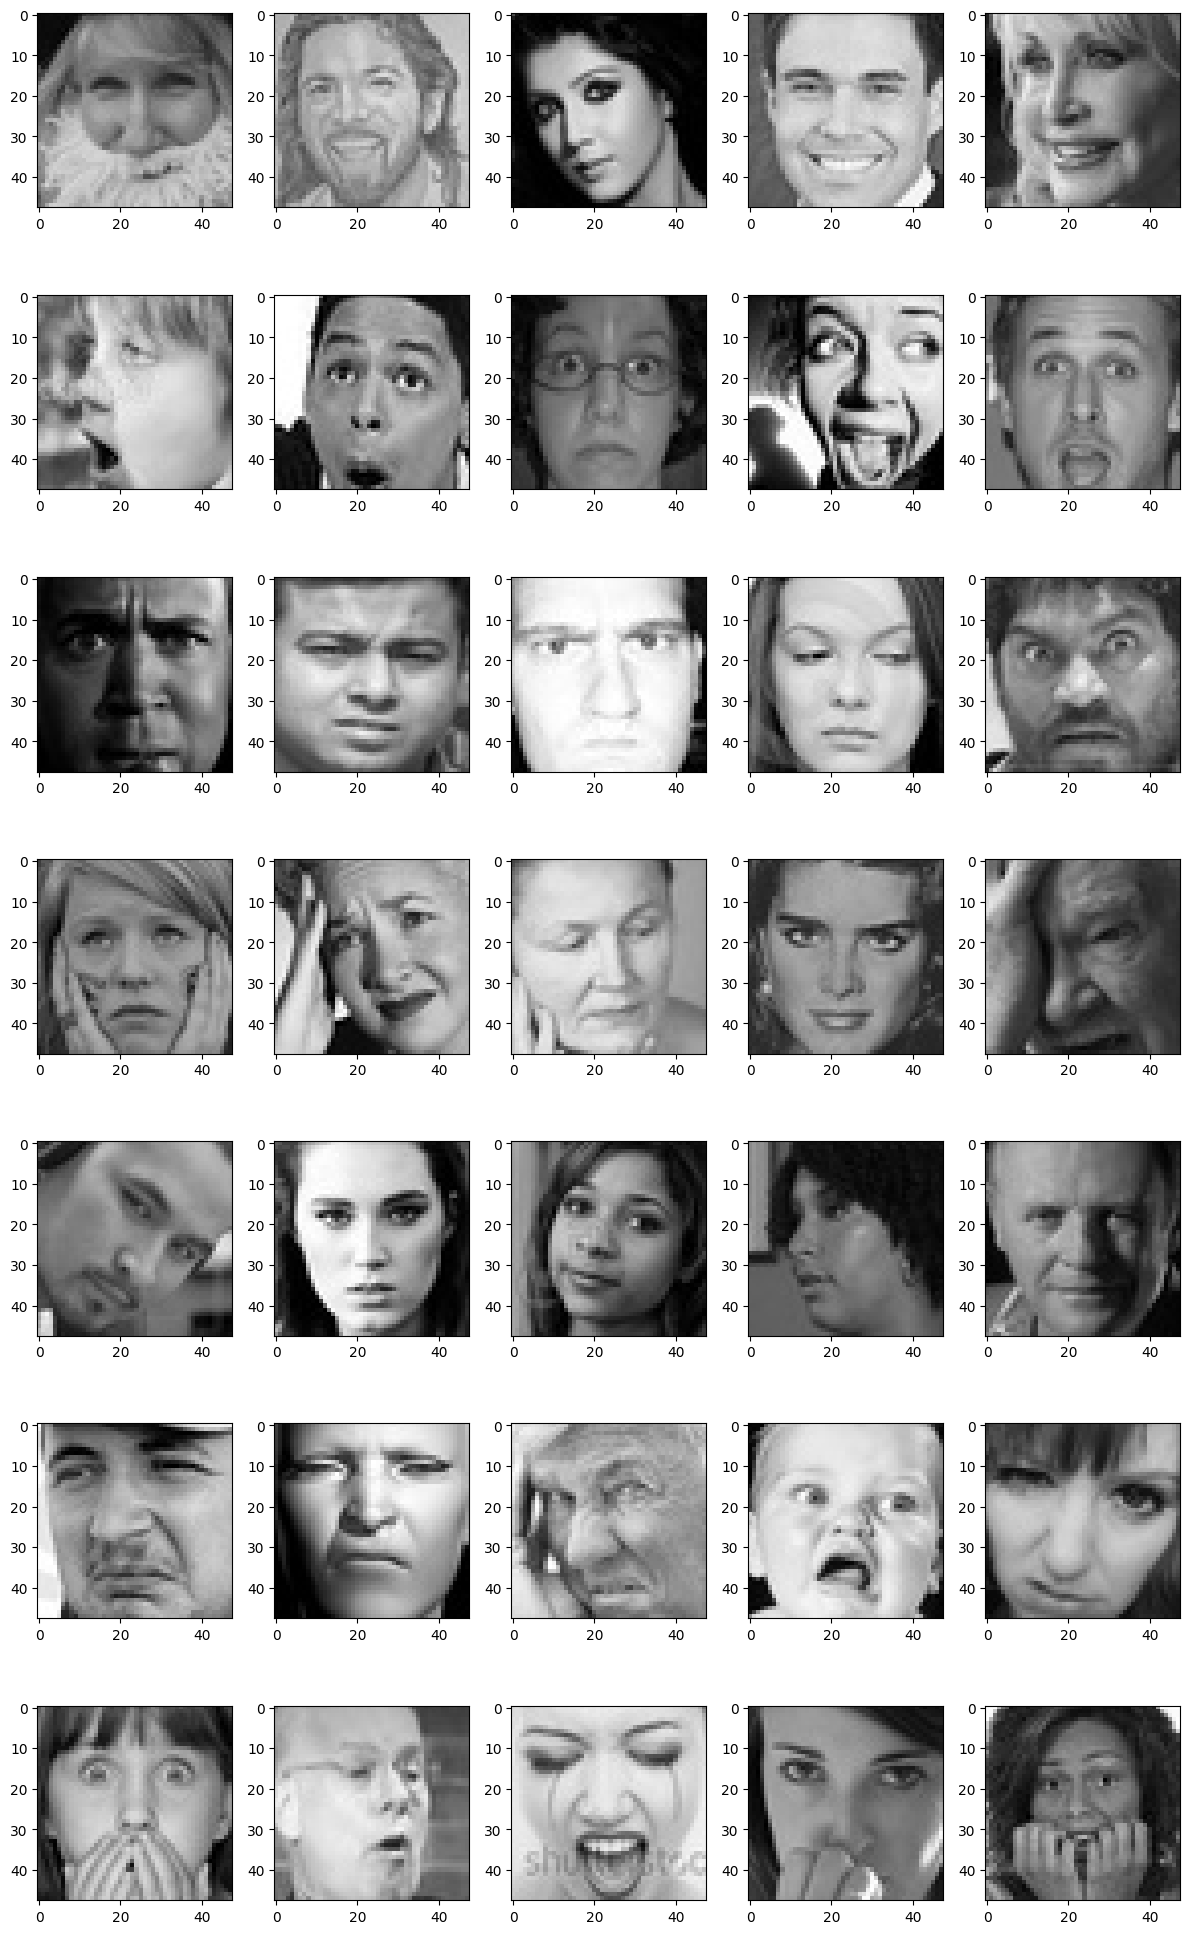

In [12]:
plt.figure(0, figsize=(12,20))
cpt = 0
for expression in os.listdir(folder_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(folder_path + "train/" + expression + "/" +os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [13]:
for expression in os.listdir(folder_path + "train"):
    print(str(len(os.listdir(folder_path + "train/" + expression))) + " " + expression + " images")

7164 happy images
3205 surprise images
3993 angry images
4938 sad images
4982 neutral images
436 disgust images
4103 fear images


The expression classes in our training dataset are fairly balanced, with the exception of the 'disgust' category, which has noticeably fewer samples. 

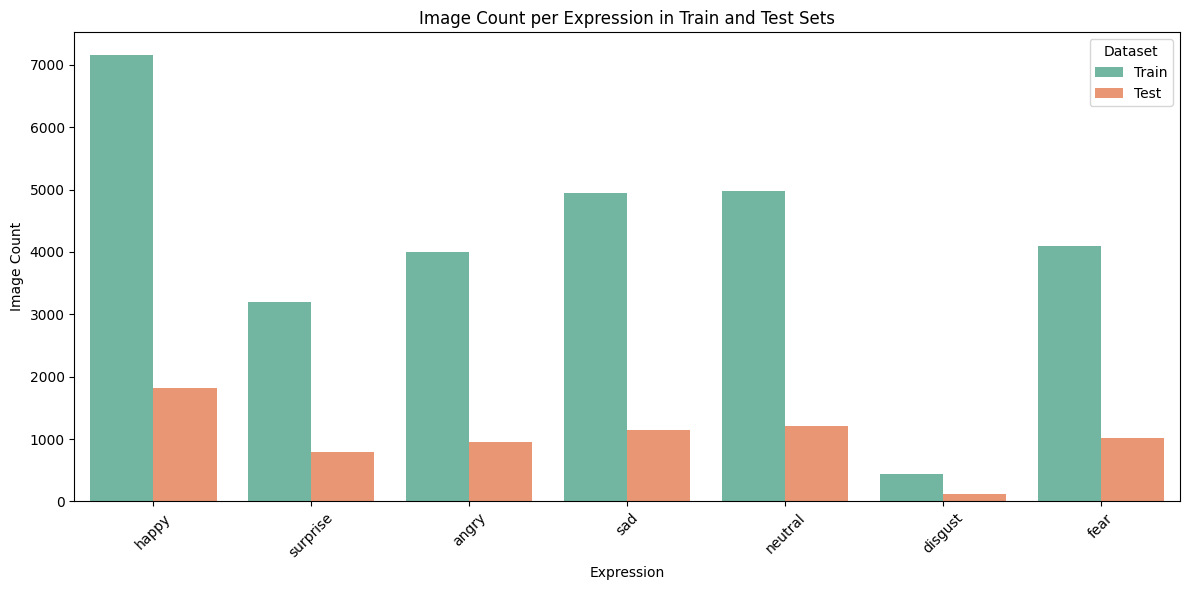

In [16]:
def get_expression_counts(folder):
    counts = {}
    for expression in os.listdir(folder):
        counts[expression] = len(os.listdir(os.path.join(folder, expression)))
    return counts

train_path = os.path.join(folder_path, "train")
test_path = os.path.join(folder_path, "validation")

train_counts = get_expression_counts(train_path)
test_counts = get_expression_counts(test_path)

# --- Step 2: Create a combined DataFrame for seaborn ---
df_train = pd.DataFrame(list(train_counts.items()), columns=["Expression", "Count"])
df_train["Set"] = "Train"

df_test = pd.DataFrame(list(test_counts.items()), columns=["Expression", "Count"])
df_test["Set"] = "Test"

df_combined = pd.concat([df_train, df_test], axis=0)

# --- Step 3: Plot grouped bar chart ---
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x="Expression", y="Count", hue="Set", palette="Set2")
plt.title("Image Count per Expression in Train and Test Sets")
plt.xlabel("Expression")
plt.ylabel("Image Count")
plt.legend(title="Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

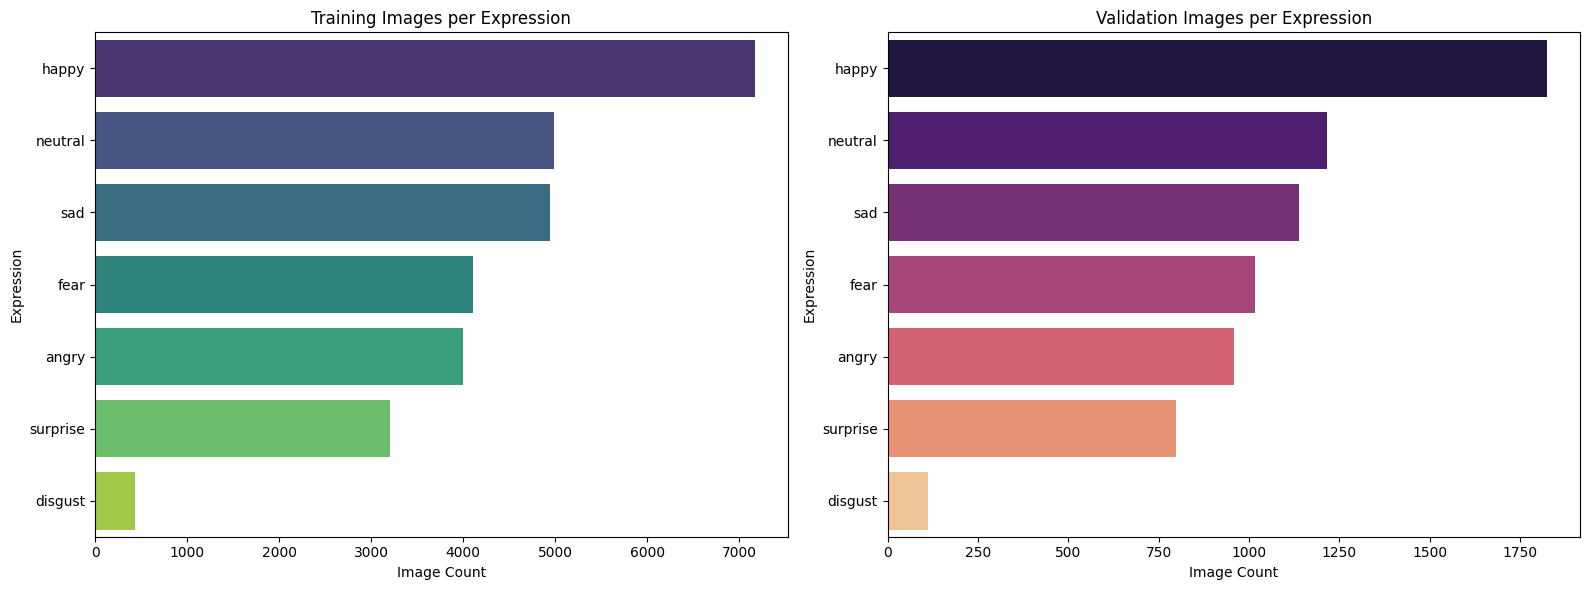

In [ ]:
train_counts = {}
for expression in os.listdir(folder_path + "train"):
    train_counts[expression] = len(os.listdir(os.path.join(folder_path, "train", expression)))
df_train = pd.DataFrame(list(train_counts.items()), columns=["Expression", "Count"])
df_train = df_train.sort_values(by="Count", ascending=False)


val_counts = {}
for expression in os.listdir(folder_path + "validation"):
    val_counts[expression] = len(os.listdir(os.path.join(folder_path, "validation", expression)))
df_val = pd.DataFrame(list(val_counts.items()), columns=["Expression", "Count"])
df_val = df_val.sort_values(by="Count", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train data plot
sns.barplot(
    x="Count", y="Expression", data=df_train,
    hue="Expression", palette="viridis", ax=axes[0], legend=False
)
axes[0].set_title("Training Images per Expression")
axes[0].set_xlabel("Image Count")
axes[0].set_ylabel("Expression")

# Validation data plot
sns.barplot(
    x="Count", y="Expression", data=df_val,
    hue="Expression", palette="magma", ax=axes[1], legend=False
)
axes[1].set_title("Validation Images per Expression")
axes[1].set_xlabel("Image Count")
axes[1].set_ylabel("Expression")

plt.tight_layout()
plt.show()